# Einführung in Supervised Learning

In diesem Notebook werden die Grundlagen des Supervised Learning eingeführt, welches einen der zentralen Ansätze im Machine Learning bildet. Du erfährst, was Supervised Learning ist, für welche Art von Problemen es eingesetzt wird und wirst anhand eines Beispiels Intuition für diese Methode entwickeln.

### Lernziele
Am Ende des Notebooks kannst du:
- den Begriff **Supervised Learning** verständlich erklären und von **Unsupervised Learning** abgrenzen,
- die Begriffe **Klassifikation** und **Regression** unterscheiden und ihre typische Anwendungsfälle benennen,
- nachvollziehen, wie Modelle aus Daten lernen, indem sie Fehler minimieren,
- ein geeignetes Problem mittels **linearer Regression** mit `scikit-learn` lösen

Dieses Wissen bildet die Grundlage für die folgenden Kapitel, in denen du Klassifikationsmodelle wie **Logistische Regression** selbst implementieren und anwenden wirst. Also, los geht's!

## Was ist Supervised Learning?

Supervised Learning ist ein Sammelbegriff für Modelle, die mit _beschrifteten Daten_ trainiert werden. Das sind Daten, bei denen für jede Eingabe ($X$) bereits das zugehörige Ergebnis ($y$) bekannt ist. Das Ziel ist eines Supervised Learning-Modells ist es, aus den Daten eine Funktion zu erstellen, die _neuen, unbekannten_ Eingaben eine gute Vorhersage zuordnen kann. Die Qualität dieser Vorhersagen hängt von der Menge und der Qualität der zur Verfügung stehenden Daten ab.

Ein Supervised-Learning-Problem besteht demnach aus zwei Hauptbestandteilen:
1. **Eingabedaten** $X$ – die Merkmale (oder _Features_), die das Modell erhält, um eine Vorhersage zu treffen.
2. **Zielvariable** $y$ – das Ergebnis (oder _Label_), das wir mit Hilfe der Eingabedaten vorhersagen wollen.

### Beispiele für Supervised Learning

- **Vorhersage des Preises** eines Hauses basierend auf dessen Fläche, Standort und Anzahl der Zimmer. 
- **Klassifizierung von E-Mails** in „Spam“ oder „Nicht-Spam“ basierend auf dem Inhalt und der Struktur der Nachricht.
- **Vorhersage des Produktionsausstoßes** basierend auf Maschineneinstellungen und Umgebungsfaktoren.

### Supervised Learning: Typen

Die Beispiele oben enthalten schond die zwei grundlegenden Typen des Supervised Learning: **Regression** und **Klassifikation**.

1. **Regression**: Bei einer Regressionsaufgabe wird eine **kontinuierliche Zielvariable** vorhergesagt. Das Ziel ist es, eine Funktion zu finden, die die Eingabewerte in kontinuierliche Werte überführt. Ein Beispiel ist die Vorhersage des Aktienkurses oder der Temperatur.
  
2. **Klassifikation**: Bei einer Klassifikationsaufgabe wird eine **diskrete Zielvariable** vorhergesagt. Hierbei handelt es sich um eine festgelegte Anzahl an Klassen, und das Ziel ist es, die Eingabe in eine dieser Klassen zuzuordnen. Ein Beispiel ist die Kategorisierung von Bildern in „Hund“, „Katze“ oder „Pferd“.

### Vergleich: Supervised Learning vs. Unsupervised Learning

Während das Supervised Learning auf **beschrifteten Daten** basiert, arbeitet das **Unsupervised Learning** mit **unbeschrifteten Daten**. Bei unbeschrifteten Daten sind die Zielvariablen nicht bekannt – das Modell hat nur die Eingabedaten $X$ zur Verfügung, ohne dass für diese Eingaben Zielwerte existieren. Das Ziel des Unsupervised Learning ist es daher nicht, eine bestimmte Zielvariable vorherzusagen, sondern **Strukturen oder Muster** innerhalb der Daten zu erkennen.

#### Beispiele für Unsupervised Learning

- **Kundensegmentierung**: Gruppen von Kunden mit ähnlichen Eigenschaften oder Verhaltensmustern erkennen, um zielgerichtete Marketingstrategien zu entwickeln.
- **Anomalieerkennung**: Anomale Datenpunkte wie z.B. Betrugsversuche bei Kreditkarten identifizieren.
- **Dimensionalitätsreduktion**: Mit Verfahren wie Principal Component Analysis (PCA) die Anzahl der Variablen reduzieren, um die Daten zu vereinfachen und gleichzeitig die wesentlichen Informationen zu bewahren.

#### Unterschiede zwischen Supervised und Unsupervised Learning

| Merkmal               | Supervised Learning                         | Unsupervised Learning                            |
|-----------------------|---------------------------------------------|--------------------------------------------------|
| **Zielvariable**      | Vorhersage eines bekannten Labels           | Keine Zielvariable, da keine Labels vorhanden    |
| **Trainingsdaten**    | Beschriftete Daten (mit $X$ und $y$)| Unbeschriftete Daten (nur $X$)               |
| **Ziel**              | Vorhersagen treffen oder klassifizieren     | Muster, Cluster oder Strukturen entdecken        |
| **Beispiel**          | Preisvorhersage, Spam-Klassifikation        | Kundensegmentierung, Anomalie-Erkennung          |
| **Typische Algorithmen** | Lineare Regression, Entscheidungsbäume, Neuronale Netze | K-Means Clustering, PCA, Assoziationsanalyse    |

Da es in diesem Notebook um Supervised Learning geht, wollen wir uns zunächst dem einfachsten Beispiel des Supervised Learning widmen, der **linearen Regression**.

# Lineare Regression
Bevor wir uns in einem zweiten Notebook der Klassifikation zuwenden, starten wir mit der Regression – also mit Vorhersagen kontinuierlicher Werte. Der Grund: Viele der zentralen Ideen des Supervised Learning wie **Modellierung**, **Fehlerminimierung** und **Trainingsprinzipien** lassen sich an diesem Beispiel gut erklären. 

Wir konzentrieren uns hier auf das einfachste Regressionsmodell: die **lineare Regression**.
Anhand der linearen Regression lernen wir, die drei Zutaten zu verstehen, die für ein Regressionsmodell notwendig sind:

- 1. Das **Modell** der Vorhersage zu formulieren,
- 2. Den **Fehler** der Vorhersage zu quantifizieren,
- 3. Den Fehler der Vorhersage zu **minimieren**.

Anschließend setzen wir ein einfaches Beispiel mit `scikit-learn` um, um den gesamten Ablauf praktisch nachzuvollziehen.

Diese Grundlagen helfen dir im zweiten Notebook, die **logistische Regression** für Klassifikationsprobleme besser zu verstehen – denn sie basiert auf dem gleichen Rezept, verwendet jedoch andere Zutaten.

### Was ist lineare Regression?

Die lineare Regression ist eines der grundlegendsten Modelle im Supervised Learning. Sie dient dazu, eine **lineare Beziehung** zwischen einer oder mehreren Eingabegrößen (*Features*) und einer Zielgröße (*Label*) zu modellieren. Die Idee: Finde eine Gerade, die möglichst gut durch die gegebenen Datenpunkte passt.

### Zutat 1: Das Modell - Die Gerade

Im linearen Fall ist die Wahl des Modells schon klar: Eine Gerade. Im Fall von nur einem Feature $x$ (z.B. die Quadratmeteranzahl) und einem Label $y$ (z.B. der Hauspreis) ist das mathematische Modell also:

\begin{equation}
\hat{y} = w x + b
\tag{1}
\end{equation}

* $x$: Eingabewert (Fläche des Hauses)
* $\hat{y}$: vorhergesagter Zielwert (Preis)
* $w$: Gewicht (Steigung der Geraden)
* $b$: Bias (Achsenabschnitt)

Ziel ist es, die Parameter $w$ und $b$ so zu wählen, dass die Gerade möglichst gut zu den vorhandenen Daten passt.

**Achtung:**
Es sollte klar sein, dass die Annahme einer linearen Beziehung zwischen den Features und dem Label nicht immer gerechtfertigt ist. Bei Hauspreisen könnte man annehmen, dass eine solche Beziehung besteht. Ein Quadratmeter kostet soundsoviel, der nächste wird nicht teurer oder billiger sein. Allerdings ist beispielsweise der Zusammenhang zwischen der Außentemperatur und dem Stromverbrauch **nicht linear**: bei sehr niedrigen **und** sehr hohen Temperaturen steigt der Verbrauch, während er in einem mittleren Bereich eher konstant bleibt. Weiterhin kann die lineare Beziehung ab einem bestimmten Bereich scheitern (siehe Bild). In solchen Fällen kann ein lineares Modell die Realität nur unzureichend abbilden und komplexere Modelle wie Polynomregressionen oder nichtlineare Verfahren (z. B. Entscheidungsbäume oder neuronale Netze) könnnten besser geeignet sein.

<center><img src="https://miro.medium.com/v2/resize:fit:922/1*_qoaFqMVgjstmtJNp-zNrw.png"></center>

#### Mehrdimensionaler Fall

Im Allgemeinen haben wir allerdings nicht nur _ein_ Feature, sondern z.B. $p$ verschiedene. Um beim Beispiel des Hauspreises zu bleiben:

\begin{align*}
x_1: \mathrm{Quadratmeter}, \quad & x_2: \mathrm{Zimmeranzahl}, & \dots & \quad x_p: \mathrm{Nähe \, zum \, Zentrum}
\end{align*}

Wir haben außerdem nicht nur _einen_ Feature-Vektor (von _einem_ Haus), sondern viele Daten von z.B. $n$ Häusern:
\begin{align*}
x^{(1)} = \begin{pmatrix} 200 & 3 & \dots & 1\end{pmatrix}, \quad & x^{(2)} = \begin{pmatrix} 840 & 6 & \dots & 1.6 \end{pmatrix}, & \dots & \quad x^{(n)} = \begin{pmatrix} 20 & 1 & \dots & 14\end{pmatrix}
\end{align*}
Für jedes dieser Häuser wollen wir _einen_ Wert (den Preis) vorhersagen. Unser Wert $\hat{y}$ wird also zu einem ($n \times 1$)-Vektor. Da nun außerdem zu jedem der $p$ Features ein separates Gewicht $w_i$ gehört, wird $w$ zu einem ($p \times 1$)-Vektor. Weiterhin gibt es nun für jedes der insgesamt $n$ Häuser nicht nur ein Feature, sondern einen Feature-Vektor mit $p$ Features. Dadurch wird $x$, der Input, zu einer ($n \times p$)-Matrix $X$. Auch $b$ muss jetzt auf alle $n$ Datenpunkte angewendet werden und wird zu einem ($n \times 1$)-Vektor. Insgesamt wird Formel $(1)$ damit zu:

\begin{equation}
\hat{y} = X w + b
\tag{2}
\end{equation}

Macht euch klar, dass die Dimensionen auf der rechten Seite so übereinstimmen, dass alle Operationen definiert sind und wie gewünscht einen Vektor der Dimension ($n \times 1$) ergeben.

**Anmerkung**: Es ist mathematisch gesehen egal, ob man am Ende $b$ auf alle Elemente von $\hat{y}$ addiert oder den Parameter gleich in den Gewichts-Vektor $w$ einbaut. Wenn man $X_{\mathrm{new}} = \begin{pmatrix} x_1^{(1)} & x_2^{(1)} & \dots & 1 \\ x_1^{(2)} & x_2^{(2)} & \dots & 1 \\ \dots & \dots & \dots & \dots \end{pmatrix}$ wählt und $w_{\mathrm{new}} = \begin{pmatrix} w_1 & w_2 & \dots & b \end{pmatrix}^\top$, dann ist folgender Ausdruck äquivalent zu Gleichung $(2)$:

$$
\hat{y} = X_{\mathrm{new}} w_{\mathrm{new}}
\tag{3}
$$

$X$ und $w$ bekommen dann eine zusätzliche Dimension und nehmen jeweils die Form $(n \times (p+1))$ und $((p+1) \times 1)$ an. Überprüft die Äquivalenz selbst, wenn ihr euch unsicher seid.

Auch, wenn wir jetzt mit Matrizen und Vektoren rechnen, ist das Ergebnis das gleiche: Wir kombinieren verschiedene Features linear, um zu einer Vorhersage zu kommen. Jedes der $n$ Elemente von $\hat{y}$ (eins für jedes Haus in unserem Datensatz) ist eine Linearkombination von den $p$ Features:
$$
\hat{y_i} = \sum_{j=1}^p \left(x_i^{(j)} \cdot w_j\right) + b
$$

### Zutat 2: Die Verlustfunktion - Der Mean Squared Error

Damit das Modell die optimalen Parameter „lernt“, brauchen wir ein Maß dafür, wie gut (oder schlecht) eine bestimmte Wahl von $w$ und $b$ ist. Dafür verwenden wir eine **Verlustfunktion** (engl. _loss function_). Bei der linearen Regression ist das typischerweise der **mittlere quadratische Fehler (Mean Squared Error, MSE)**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* $y_i$: tatsächlicher Zielwert
* $\hat{y}_i$: vorhergesagter Zielwert ($X w + b$)
* $n$: Anzahl der Trainingsbeispiele

Die Funktion misst die Abweichung zwischen einer Vorhersage des Modells ($\hat{y}_i$) und dem wirklichen Wert ($y_i$), quadriert diese Abweichung und summiert sie über alle Trainingsdaten. Die Abweichung, also $(y_i - \hat{y}_i)$ wird auch Residuum (lat. Rest, pl. Residuen) genannt. Die Funktion ist durch die Quadrierung der Residuen immer größer als 0 und wird nur 0, wenn die Vorhersage in jedem Punkt mit dem richtigen Wert übereinstimmt.
Durch die Quadrierung wiegen kleine Fehler übrigens auch weniger als große Fehler, beziehungsweise: Ausreißer dominieren den MSE-Fehler.

**Praktische Übung:**
In der Folgenden Zelle kannst du ein Gefühl dafür bekommen, wie die MSE-Funktion in einer Dimension funktioniert. Führe die Zelle aus und benutze die Slider, um einen möglichst geringen MSE-Wert zu erreichen. Kannst du dir vorstellen, warum der geringste MSE-Wert nicht exakt bei den "richtigen" Parameterwerten ($w=2$, $b=1$) erreicht wird? Tipp: Achte darauf wie das Label im Code generiert wird.

**Weiterführende Aufgabe:**
Füge im Code einen zusätzlichen Ausreißer-Datenpunkt hinzu (z.B. $(10, 99)$) und beobachte, wie sich der MSE-Wert verändert. Beschreibt die Gerade mit dem geringsten Verlust die Datenpunkte immer noch gut?

In [ ]:
### Einmalig ausführen, damit das Widget funktioniert
!git clone https://github.com/wolfromanlist/MLForEngineers.git
%cd MLForEngineers/Notebooks/

from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import numpy as np
from scripts.RegressionWidget_Plotly import RegressionWidget

# Daten vorbereiten
generator = np.random.default_rng(2948292983384)
x = np.linspace(0, 20, 10)
y_real = 2 * x + 1 + 15 * (generator.random((1, 10)) - 0.5)
y_real = y_real.flatten()

###
# Hier Code zur weiterführenden Aufgabe einfügen
###

widget = RegressionWidget(x, y_real)
widget.show()

Output()

### Zutat 3: Die Minimierung des Fehlers

Wie bereits erwähnt ist das Ziel des Trainings, die Werte von $w$ und $b$ so zu wählen, dass der Fehler (MSE) möglichst klein wird. Dafür gibt es verschiedene Verfahren. Für die lineare Regression gibt es eine **analytische Lösung durch Ordinary Least Squares (OLS)** oder auch **iterative Verfahren** wie Gradient Descent.

In diesem Notebook verwenden wir zunächst die OLS-Methode, da sie eine anschauliche, mathematisch exakte Lösung liefert. Dem Gradient Descent-Verfahren werden wir uns in späteren Lektionen zu neuronalen Netzen noch widmen.

#### Ordinary Least Squares (OLS)

**Ordinary Least Squares**, oder der Algorithmus der kleinsten Quadrate, ist ein Verfahren zur Bestimmung der „besten“ Parameter in der linearen Regression. Ziel ist es, die Steigung und den Achsenabschnitt einer Linie so zu berechnen, dass die Summe der quadrierten Residuen (also die Fläche der Quadrate im Bild) minimiert wird. OLS ist für die meisten linearen Regressionsprobleme sehr effizient.

![Least Squares](https://kenndanielso.github.io/mlrefined/mlrefined_images/superlearn_images/Least_Squares.png)

#### Mathematische Grundlage des OLS-Algorithmus

Die lineare Regression beschreibt eine Zielvariable $y$ als lineare Funktion der unabhängigen Variablen $X$. Also $\hat{y} = X w$, wobei wie bereits erwähnt:
- $X$: Matrix der unabhängigen Variablen (Dimension $n \times (p + 1)$, mit $n$ Datenpunkten und $p$ Variablen, $+1$ für den $b$-Parameter),
- $w$: Vektor der Parameter, die es zu bestimmen gilt (Dimension $(p+1) \times 1 $),
- $\hat{y}$: Vektor der vorhergesagten Werte (Dimension $ n \times 1 $).

Das Ziel des OLS ist es, die Parameter $w$ so zu wählen, dass der **Mean Squared Error (MSE)** minimiert wird:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - (Xw)_i)^2 = \frac{1}{n} \left( (y - X w)^T (y - X w) \right)
$$

wobei $y_i$ die tatsächlichen Werte und $\hat{y}_i$ die durch das (lineare) Modell vorhergesagten Werte sind.

Um die Werte für $w$ zu bestimmen, wird die MSE als Funktion von $w$ abgeleitet und auf null gesetzt:
$\frac{\partial}{\partial w} \left( (y - X w)^T (y - X w) \right) = 0$. \
Dies ergibt die sogenannte **Normalengleichung**:

$$w = (X^T X)^{-1} X^T y$$

Hierbei ist:
- $X^T$ die Transponierte der Matrix $X$,
- $(X^T X)^{-1}$  die Inverse von $ X^T X$, vorausgesetzt, $ X^T X $ ist invertierbar.

Durch Lösen dieser Gleichung erhält man die optimalen Werte für die Parameter $w$, welche die Summe der quadrierten Residuen minimieren.
Für die Berechnung der Parameter in der OLS-Regression sind lediglich **lineare Algebra-Berechnungen** nötig, insbesondere Matrizenmultiplikation, Transponieren und Invertieren. Es werden **keine neuronalen Netze oder iterativen Trainingsverfahren** wie bei anderen Machine-Learning-Algorithmen verwendet. Stattdessen wird ein einmaliger analytischer Lösungsschritt durchgeführt, der die optimalen Parameterwerte direkt berechnet.

### Diskussion: Ist lineare Regression Machine Learning?

Es gibt eine Diskussion darüber, ob lineare Regression tatsächlich als **Machine Learning** gezählt werden sollte oder ob sie besser als **statistisches Modell** betrachtet wird. Diese Debatte beruht auf der Tatsache, dass **Machine Learning** typischerweise auf Verfahren basiert, die aus den Daten iterativ „lernen“ und auf Rückkopplung (wie Fehlerausgleich bei neuronalen Netzen) angewiesen sind. Lineare Regression mit OLS hingegen ist ein **deterministisches Verfahren** und wird analytisch berechnet, ohne dass Lernschritte oder Fehleranpassungen erforderlich sind.

#### Argumente, warum lineare Regression als Machine Learning betrachtet werden könnte:
1. **Vorhersagefähigkeit**: Lineare Regression wird für Vorhersagen eingesetzt, und die Nutzung von Daten für Vorhersagen ist ein zentraler Bestandteil des Machine Learnings.
2. **Teil vieler ML-Frameworks**: Lineare Regression ist in allen ML-Frameworks (wie `scikit-learn`) implementiert und wird in praktischen ML-Workflows oft angewandt.
3. **Modellbewertung und Anpassung**: Viele der Metriken und Evaluationsmethoden, die in ML für die Modellbewertung verwendet werden, wie der MSE oder der R²-Score, sind auch für lineare Regression relevant.
4. **Möglichkeit zur iterativen Lösung**: Da eine analytische Lösung des Problems existiert wird zumeist der OLS-Algorithmus angewandt. Allerdings würde sich das Problem auch iterativ durch z.B. Gradient Descent lösen lassen. Aber warum mit Kanonen auf Spatzen schießen? ;)

Zusammenfassend lässt sich sagen, dass die lineare Regression an der Grenze zwischen Statistik und Machine Learning liegt. Sie wird oft als „einfachstes“ Machine-Learning-Modell betrachtet, auch wenn sie auf analytischen Lösungen basiert und nicht wie andere Modelle durch iterative Optimierung lernt.

# Hands-On: Lineare Regression in der Fertigung

Nach der ganzen Theorie wollen wir uns einem konkreten Beispiel zuwenden. In diesem Abschnitt benutzen wir lineare Regression, um vorherzusagen, wie viel Zeit eine gegebene Anzahl an Maschinen benötigt, um ein Bauteil fertigzustellen. Wir werden dabei den **Train-Test Split** und **Bewertungs-Metriken** einführen, um später zu beurteilen, wie gut unser Modell funktioniert. Abschließend werden wir das Modell erweitern, um ein Gefühl für lineare Regression mit mehr als einem Feature zu bekommen.

## Inspektion der Daten

Wie jeder gute Machine Learning Ingenieur fangen wir mit der Inspektion und Vorbereitung der gegebenen Daten an. Wir haben im Ordner "Daten" eine `csv`-Datei gegeben, die "_machine_regression_1D.csv_" heißt. Diese laden und inspizieren wir mit `pandas`.

In [ ]:
import pandas as pd

# Daten importieren
df = pd.read_csv('../Data/machine_regression_1D.csv', index_col = 0)

# Daten inspizieren
print(df.head())

# Überprüfen auf fehlende Werte
print("\nFehlende Werte:\n", df.isnull().sum())

   machines  fabrication_time
0         5         38.546553
1         7         28.156907
2         6         34.543581
3         5         39.147008
4         4         46.326472

Fehlende Werte:
 machines            0
fabrication_time    0
dtype: int64


Die Datei enthält zwei Spalten: "machines" (Anzahl) und "fabrication_time" (in Minuten), welche jeweils keine fehlenden Werte beinhalten. Eine nützliche Anwendung der Analyse dieser Daten wäre vorherzusagen, wie lange die Fertigung eines Bauteils dauert, wenn man eine bestimmte Anzahl an Maschinen gegeben hat. Betrachten wir die Daten kurz visuell:

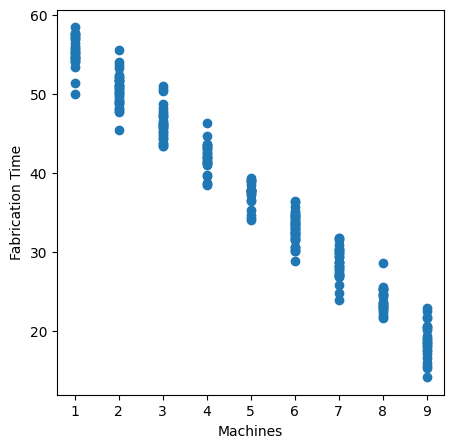

In [11]:
import matplotlib.pyplot as plt

# Aufteilen in Features (X) und Zielvariable (y)
X = df[['machines']].values
y = df['fabrication_time'].values

fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X, y)
plt.xlabel('Machines')
plt.ylabel('Fabrication Time')
plt.show()

Scheinbar gilt bei bis zu 9 Maschinen: Je mehr Maschinen wir haben, desto geringer die Fertigungszeit. Und diese Beziehung scheint (trotz der kleinen Streuung) durchaus linear zu sein. Perfekt für ein lineares Regressionsmodell!

## Train-Test Split

Bevor wir nun das Modell erstellen, teilen wir unsere Daten in ein **Training-Set** und ein **Test-Set** auf. Mit dem Training-Set, welches einen Großteil der Daten beinhaltet, werden wir das Modell trainieren. Mit dem Test-Set werden wir später das trainierte Modell überprüfen. Wir fragen dann für jeden Eintrag im Test-Set ab, welche Vorhersage für die Fertigungszeit das Modell für diesen Eintrag liefert. Dann vergleichen wir die Vorhersage des Modells mit dem echten Wert. Je besser die Übereinstimmung, desto nützlicher ist unser Modell. 

**Warum trainieren wir das Modell nicht einfach mit allen Daten?**

Die Frage ist durchaus berechtigt und die Antwort hat mit dem Prozess der Modellerstellung zu tun. Als Modellersteller wollen wir herausfinden: "Wie gut ist das Modell, das ich baue, zur Vorhersage bei _neuen, unbekannten_ Daten geeignet?". Dieser Aspekt der Modellbewertung wird als Generalisierung bezeichnet. Wenn wir das Modell mit dem gesamten Datensatz trainieren und anschließend einen Teil dieser Daten zur Evaluation verwenden, dann haben wir ein Problem: Die Daten, die wir zum Testen nutzen, haben bereits das Modell beeinflusst. Sie waren Teil des Trainingsprozesses und haben die Parameter mitbestimmt. \
Ein Beispiel: Wenn der Punkt $(\mathrm{machines},\mathrm{fabrication\_time})=(3,46)$ im Training enthalten war, wird eine spätere Vorhersage für $x=3$ zwangsläufig von genau diesem Trainingspunkt beeinflusst sein. Die Bewertung anhand dieses Punkts misst also nicht, wie gut das Modell auf neue Daten reagiert, also generalisiert, sondern wie gut es sich an bereits Gelerntes erinnert. Um wirklich herauszufinden, wie gut das Modell verallgemeinert, müssen wir es auf Daten testen, die es nicht zuvor gesehen hat. Deshalb teilen wir den Datensatz in der Regel auf: etwa 80 % der Daten werden zufällig ausgewählt und zum Training verwendet, die übrigen 20 % bilden das Test-Set. Die Idee dahinter: Wir verzichten bewusst auf einen Teil der Daten beim Training (und bußen damit Genauigkeit ein), um im Gegenzug eine realistischere Einschätzung der Modell-Performance auf unbekannten Daten zu bekommen.

Die Umsetzung des Train-Test Splits ist mit `scikit-learn` sehr einfach: Wir verwenden die Methode `train_test_split()`, die uns direkt unsere Features und Labels in Training- und Test-Sets unterteilt. Als Argumente stellen wir die Features (X) und Labels (y) bereit und geben die gewünschte `test_size` an. Wahlweise können wir für Reproduzierbarkeit noch einen Seed (`random_state`) angeben.

In [12]:
from sklearn.model_selection import train_test_split

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Standardisierung

Weiterhin standardisieren wir unsere Trainingsdaten mit dem aus Notebook 2 bekannten Verfahren. 

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardisieren der Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Erste Zeilen der standardisierten Trainingsdaten:\n", X_train[:5]) 

Erste Zeilen der standardisierten Trainingsdaten:
 [[-0.79390846]
 [ 0.78600887]
 [ 0.39102954]
 [ 1.57596754]
 [-0.39892913]]


## Die Lineare Regression

Auch die eigentliche Regression ist mit `scikit-learn` ein sehr einfacher Prozess. Er besteht im Wesentlichen aus dem Code in der nächsten Zelle. Dort wird:

1. Ein Modell vom Typ `LinearRegression()` erstellt und
2. Das Modell mittels `.fit()` mit den Trainingsdaten trainiert

Die gelernten Parameter sind dann als `model.coef_` ($w$) und `model.intercept_` ($b$) abrufbar.

In [14]:
from sklearn.linear_model import LinearRegression

# Modellinitialisierung und Training
model = LinearRegression()
model.fit(X_train, y_train)

# Ausgabe der Modellparameter
print("Gewicht w:", model.coef_[0])
print("Achsenabschnitt b:", model.intercept_)

Gewicht w: -11.504751132490556
Achsenabschnitt b: 37.3310675682069


Im Hintergrund wird hier genau der OLS-Algorithmus ausgeführt, also letztendlich die Lösung für $w$ mit $w = (X^T X)^{-1} X^T y$ berechnet.

## Evaluation des Modells

Nachdem wir die Regressionsgerade bestimmt haben, stellt sich die Frage:
**Wie gut passt unser Modell zu den beobachteten Daten?**

Zur Beantwortung dieser Frage wurden über die Jahrzehnte zahlreiche **Evaluationsmetriken** entwickelt, welche auf dem noch unbekannten Test-Set berechnet werden. Sie helfen, die Qualität der Modellvorhersagen quantitativ zu beurteilen und beleuchten dabei jeweils einen etwas anderen Aspekt des Modellverhaltens. Im Folgenden stellen wir einige der wichtigsten Metriken vor, erläutern ihre Berechnung und diskutieren ihre Aussagekraft.

Da Evaluationsmetriken allein jedoch ein sehr limitiertes Bild von der Leistung unseres Modells zeichnen, sollte allem voran _immer_ die **Visualisierung der Daten** und des Modellverhaltens stehen. Dies gibt uns meistens direkt ein Bild davon, wie gut das Modell performt und kann _danach_ durch die Zusatzinformationen der Metriken ergänzt werden:

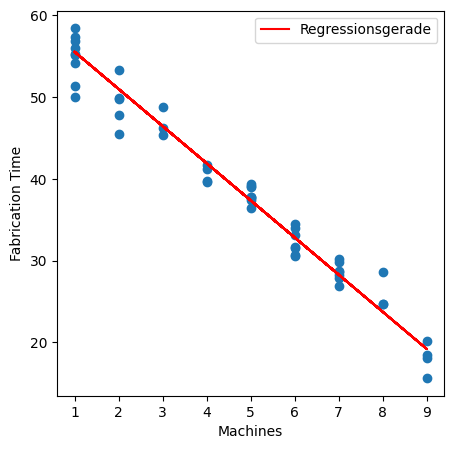

In [15]:
fig, ax = plt.subplots(figsize=(5,5))

### Prediction mit den Test-Daten erzeugen
x_scaled = X_test
y_pred = model.predict(X_test)

### Rücktransformation von x_scaled, um zu normalen Einheiten zurückzukehren
x_normal = scaler.inverse_transform(x_scaled)

### Plotten
ax.plot(x_normal, y_pred, color = 'red', label='Regressionsgerade')
ax.scatter(x_normal, y_test)
plt.xlabel('Machines')
plt.ylabel('Fabrication Time')
plt.legend()
plt.show()

Wir sehen, dass das Modell einen ziemlich guten Fit liefert. Der generelle lineare Trend wird gut beschrieben und allein die natürliche Streuung der Daten sorgt für eine Abweichung von der Regressionsgeraden. Lasst uns nun einige Metriken zur näheren Bewertung heranziehen.

### 1. Mean Squared Error (MSE)

Der **MSE** ist uns schon bekannt, da mit ihm auch die OLS-Optimierung durchgeführt wird. Er misst den durchschnittlichen quadrierten Unterschied zwischen den Vorhersagen $\hat{y}_i$ und den echten Werten $y_i$ und summiert sie zu einer Zahl:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

> **Eigenschaften:**
>
> * Belohnt kleine Fehler, bestraft große Fehler überproportional.
> * Besonders sensitiv gegenüber Ausreißern.
> * Je näher bei 0, desto besser der Fit
>
> **Vorteil:** Glatte mathematische Eigenschaften, gut geeignet für Optimierungsverfahren. \
> **Nachteil:** Kann durch einzelne Ausreißer stark verzerrt werden.

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 4.16


### 2. Root Mean Squared Error (RMSE)

Der **RMSE** ist einfach die Quadratwurzel des MSE:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

> **Eigenschaft:**
>
> * Folgt der Definition der Standardabweichung
> * Hat dieselbe Einheit wie die Zielvariable $y$, was die Interpretation erleichtert (im Gegensatz zum MSE, der quadrierte Einheiten hat).
> * Beibehaltung der **Empfindlichkeit gegenüber großen Fehlern**.
>
> Der RMSE ist besonders dann hilfreich, wenn du Fehler in denselben Einheiten wie deine Daten interpretieren möchtest. Wenn deine Daten normalverteilt sind, dann sagt die Standardabweichung und damit der RMSE aus, dass ca. 68% der Vorhersagen in einem Bereich von $\pm \mathrm{RMSE}$ um den tatsächlichen Wert verteilt liegen. 

In [17]:
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 2.04


Beide Werte sind nahe 0 und deuten auf einen guten Fit hin. Der RMSE-Wert sagt uns, dass ca. 68% der Werte um weniger als $2.04$ Minuten vom tatsächlichen Wert abweichen (vorausgesetzt, dass die Abweichung normalverteilt ist). Diese Voraussetzung lässt optisch überprüfen, indem wir die Residuen (also genau die Abweichung der Vorhersage vom tatsächlichen Wert) plotten.

Text(0.5, 1.0, 'Residuenplot')

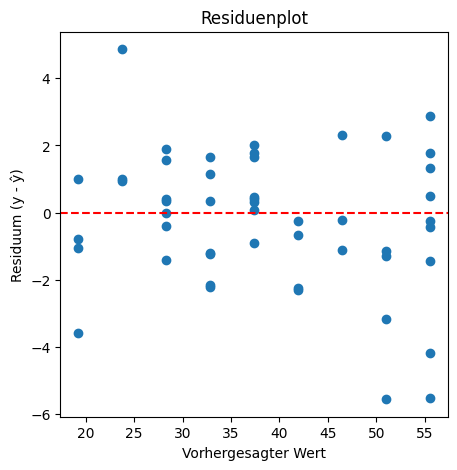

In [18]:
### Berechnen der Residuen
residuals = y_test - y_pred

### Plotten
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x=y_pred, y=residuals)
ax.axhline(0, color="red", linestyle="--")
plt.xlabel("Vorhergesagter Wert")
plt.ylabel("Residuum (y - ŷ)")
plt.title('Residuenplot')

Scheinbar folgen die Residuen keiner offensichtlichen Gesetzmäßigkeit, sondern sind über den gesamten Wertebereich um die wahren Werte verteilt. Die Abweichung als Histogramm dargestellt bestätigt unseren Verdacht der Normalverteilung:

<Axes: ylabel='Count'>

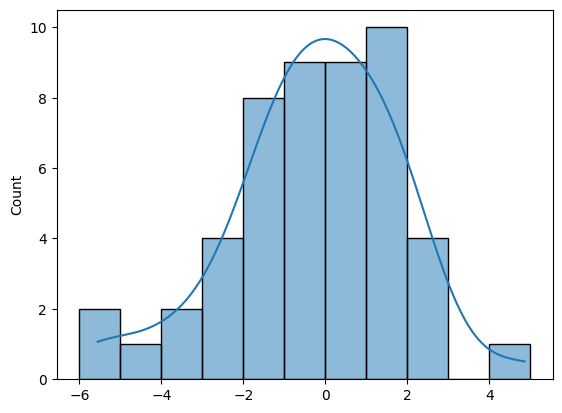

In [19]:
import seaborn as sns

sns.histplot(residuals, bins=np.arange(-6, 6, 1), kde=True)

### 3. Mean Absolute Error (MAE)

Der **MAE** misst den durchschnittlichen absoluten Fehler zwischen Vorhersage und Beobachtung:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

> **Eigenschaften:**
>
> * **Robuster gegenüber Ausreißern** als MSE oder RMSE, da keine Quadrierung.
> * Gibt ein realistisches Maß für den durchschnittlichen Fehler eines Modells.
>
> **Vorteil:** Intuitive Interpretation, insbesondere bei schiefen Datenverteilungen. \
> **Nachteil:** Nicht überall differenzierbar, daher für bestimmte Optimierungsverfahren (z. B. Gradient Descent) weniger gut geeignet.

In [20]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.55


Das bedeutet also, dass die durchschnittliche Vorhersage lediglich um 1.55 Minuten danebenliegt.

### 4. Bestimmtheitsmaß $R^2$

Das **Bestimmtheitsmaß** (auch $R^2$-Score) drückt aus, wie viel der Streuung der Zielwerte durch das Modell erklärt wird. Es ist folgendermaßen definiert:

$$
R^2 = 1 - \frac{ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }{ \sum_{i=1}^{n} (y_i - \bar{y})^2 } = 1 - \frac{\mathrm{SSR}}{SST}
$$

* $\bar{y}$: Mittelwert der Zielwerte
* $\mathrm{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$: mittlere quadrierte Abweichung der Daten vom Modell
* $\mathrm{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2$: mittlere quadrierte Abweichung der Daten vom Mittelwert

Es wird also die Summe der quadratischen Abweichungen der Daten vom Modell (**S**um of **S**quared **R**esiduals) zu der Summe der quadratischen Streuung der Daten um ihren Mittelwert (**S**um of **S**quared **T**otals) in Relation gesetzt. Also vereinfacht: Die Streuung der Daten um die Vorhersage durch die gesamte Streuung der Daten (und das ganze von 1 abgezogen). Das bedeutet, die Kenngröße benennt konkret, um wieviel die Streuung durch das Modell reduziert (oder erklärt) wird im Vergleich zur anfänglichen Streuung. Wenn die Streuung durch das Modell sehr gut erklärt wird, dann ist SSR sehr gering und der gesamte Ausruck kommt 1 nahe. Ist die Streuung durch das Modell nicht besser erklärt, also genauso wie vorher, dann ist $\mathrm{SSR}/\mathrm{SST} =  1$ und der gesamte Ausdruck wird 0. Demnach gilt:

* $R^2 = 1$: perfekter Fit
* $R^2 = 0$: Modell erklärt keine zusätzliche Varianz
* $R^2 < 0$: Modell schlechter als triviale Mittelwert-Vorhersage

> **Vorteil:** Liefert ein dimensionsloses Maß, das leicht zu vergleichen ist. \
> **Nachteil:** Kann irreführend sein – z. B. bei nichtlinearen Zusammenhängen oder wenn das Modell überangepasst ist.

Der $R^2$-Score gibt also in einer Kennzahl einen Überblick darüber, wie gut das Modell die gegebenen Daten beschreibt. Lasst ihn uns für unseren Datensatz berechnen:

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"R²-Score: {r2:.2f}")

R²-Score: 0.97


Unser Modell performt erwartbar gut, was wir allerdings auch bereits visuell gesehen haben. Da der $R^2$-Score in der Wissenschaft und den Ingenieurswissenschaften sehr häufig vertreten ist, lohnt es sich, den $R^2$-Score und seine Aussagekraft in einem kurzen Abschnitt zu hinterfragen.

**Ein kritischer Blick: Das Anscombe-Quartett** \
Das berühmte **Anscombe-Quartett** zeigt vier Datensätze mit nahezu identischen statistischen Kenngrößen (z. B. Mittelwert, Standardabweichung, $R^2$-Wert, Regressionsgerade) – aber mit völlig unterschiedlichen Verteilungen und Strukturen.

Text(0.5, 1.05, 'Anscombe-Quartett: Gleicher R², unterschiedliche Verteilungen')

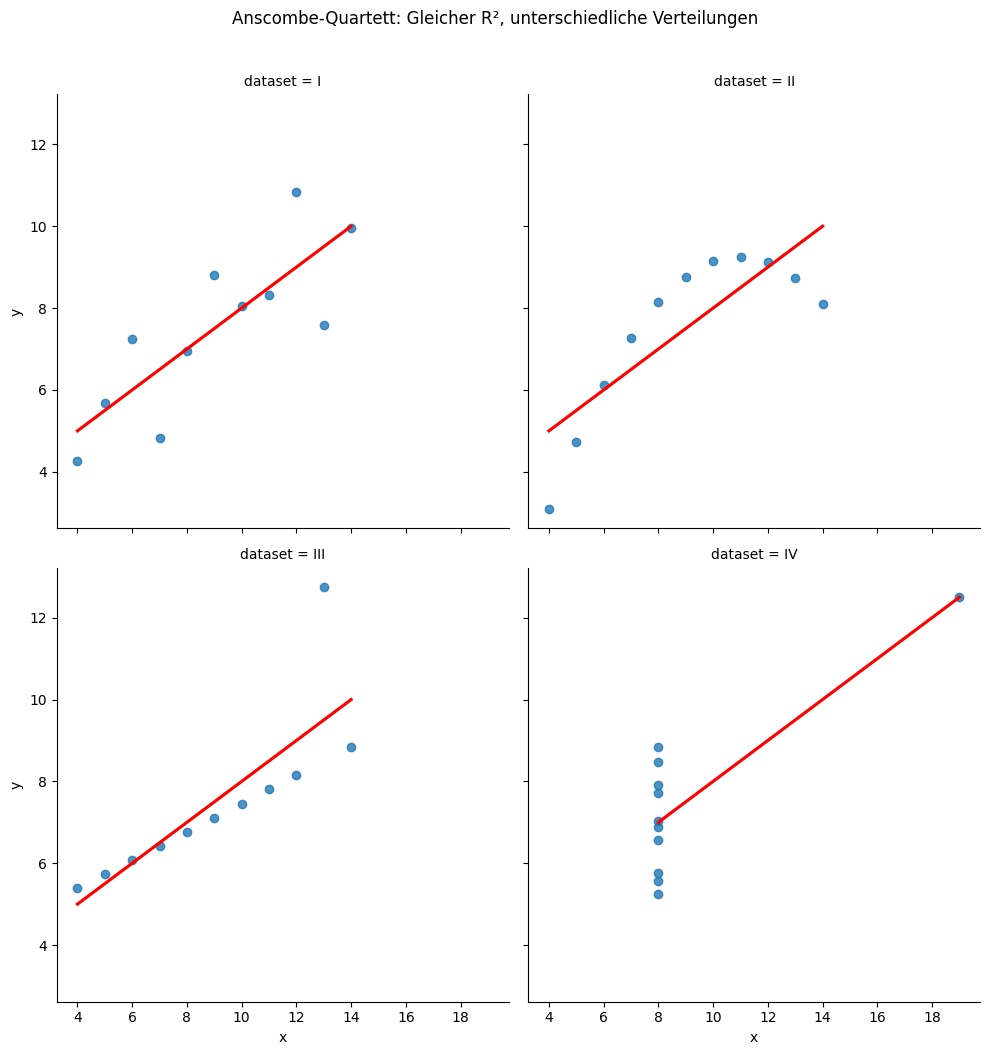

In [22]:
df = sns.load_dataset("anscombe")

sns.lmplot(data=df, x="x", y="y", col="dataset", col_wrap=2, ci=None, line_kws={"color": "red"})
plt.suptitle("Anscombe-Quartett: Gleicher R², unterschiedliche Verteilungen", y=1.05)

In jedem dieser Datensätze führt lineare Regression zu der Ausgleichsgeraden $y = 0.5 x + 3$ und zu einem $R^2$-Score von $0.666$. Allerdings ist offensichtlich, dass die Annahme einer linearen Beziehung nicht in jedem Fall gerechtfertigt ist und, im Gegenteil, die Gerade die Daten in den meisten Fällen nicht gut beschreibt.

### Fazit

Es gibt keine **perfekte Metrik** – jede hat ihre Stärken und Schwächen. In der Praxis empfiehlt es sich daher, mehrere Metriken gemeinsam zu betrachten:

* **MSE / RMSE**: gut für kontinuierliche Fehleranalyse, aber empfindlich gegenüber Ausreißern
* **MAE**: robuster, direkt interpretierbar, aber weniger sensitiv für große Fehler
* **$R^2$**: nützlich für Varianzaufklärung, aber kritisch zu hinterfragen

> **Gute Modelle erkennt man nicht nur an Zahlen, sondern auch an sinnvollen Visualisierungen und gesundem Menschenverstand.**

# Hands-On: Lineare Regression in 2D

In diesem Abschnitt werden wir das eindimensionale Beispiel ausweiten und die Fertigungszeit auf Basis eines zusätzlichen Features (`Komplexität`) vorhersagen. Die Fertigungszeit ist nun also von der Anzahl der Maschinen und der Komplexität des Bauteils abhängig. Ihr werdet sehen, dass die Schritte für die mehrdimensionale lineare Regression identisch sind mit denen der eindimensionalen linearen Regression. Allein die Visualisierungen werden sich etwas unterscheiden. Das Ziel dieses Abschnitts ist es, euch klarzumachen, dass die lineare Regression mit geringem Aufwand um beliebig viele Features erweiterbar ist. Let's go!

## Inspektion der Daten

Zunächst inspizieren wir auch die 2-dimensionalen Daten, indem wir uns die Struktur des DataFrames anschauen und die Daten zeichnen. Hierfür benutzen wir Plotly anstatt matplotlib, um einen interaktiven (drehbaren) Plot darzustellen.

In [30]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'

df = pd.read_csv('../Data/machine_regression_2D.csv', index_col= 0)

# Überblick über die Daten
print("Datenüberblick:")
print(df.head())

# Überprüfen auf fehlende Werte
print("\nFehlende Werte:\n", df.isnull().sum())

# Aufteilen in Features (X) und Zielvariable (y)
X = df[['machines', 'complexity']].values
y = df['fabrication_time'].values

fig = go.Figure()

# Plotten der Daten
fig.add_trace(go.Scatter3d(
    x=X[:,0], y=X[:,1], z=y,
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.5),
))

fig.update_layout(
    title="Fabrication Time: Machines vs Complexity",
    scene=dict(
        xaxis_title="Machines",
        yaxis_title="Complexity",
        zaxis_title="Fabrication Time",
        camera=dict(eye=dict(x=1.9, y=-1.9, z=1.1))
    ),
    width=700, height=600
)

fig.show()


Datenüberblick:
   machines  complexity  fabrication_time
0         5           3         69.215848
1         7           3         60.782204
2         6           4         75.933157
3         5           2         59.205104
4         4           1         50.802692

Fehlende Werte:
 machines            0
complexity          0
fabrication_time    0
dtype: int64


Wir sehen, dass keine Daten fehlen und die Beziehung zwischen der Fertigungszeit und den Features jeweils linear sind. Im Fall der Komplexität sind die größen positiv korrelliert (komplexeres Teil -> längere Fertigungszeit), im Falle der Maschinenzahl negativ (mehr Maschinen -> kürzere Fertigungszeit).

## Train-Test Split

Auch hier teilen wir die Daten in ein Trainings- und ein Test-Set auf. Dafür wird genau derselbe Befehl wie zuvor verwendet.

In [31]:
# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Standardisierung

Auch die Standardisierung der Daten läuft mittels `scikit-learn` genau gleich ab.

In [32]:
# Standardisieren der Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Erste Zeilen der standardisierten Trainingsdaten:\n", X_train[:5])

Erste Zeilen der standardisierten Trainingsdaten:
 [[-1.54573922 -0.43276751]
 [-0.77757649 -1.30687218]
 [-0.77757649 -1.30687218]
 [ 0.75874897  1.31544183]
 [-0.00941376  1.31544183]]


## Lineare Regression

Das fitten der Daten folgt ebenfalls den gleichen Schritten: Modellinitialisierung und Fitting. Aufgrund der zweidimensionalen Daten haben wir nun 2 Koeffizienten ($w_1$ und $w_2$). Dies entspricht den Steigungen in x- und y-Richtung einer Ebene.

In [33]:
# Modellinitialisierung und Training
model = LinearRegression()
model.fit(X_train, y_train)

# Ausgabe der Modellparameter
print("\nModell-Koeffizienten:", model.coef_)
print("Modell-Achsenabschnitt:", model.intercept_)



Modell-Koeffizienten: [-11.80985178  11.69348272]
Modell-Achsenabschnitt: 62.25325693732864


## Evaluation

Die Evaluation anhand des Test-Datensets erfolgt erneut zunächst visuell: wir plotten unsere Test-Daten und die vom Modell getroffene Vorhersage. Da es sich hier um eine Ebene handelt, ist die Visualisierung leicht anders. Da die lineare Regression nun in zwei Dimensionen erfolgt, haben wir keine Ausgleichsgerade, sondern eine Ausgleichsebene.

In [36]:
coefs = model.coef_
intercept = model.intercept_

def best_fit_plane(x1, x2, coef1, coef2, intercept):
    return coef1 * x1 + coef2 * x2 + intercept

# Rücktransformation der Standardisierung für X_test, um die Originalskala zu erhalten
print("Standardisierte Werte: (machines, complexity)\n", X_test[:5])
X_test_original = scaler.inverse_transform(X_test)
print("Originaldaten: (machines, complexity)\n", X_test_original[:5])


# Plot 1: Machines vs Complexity vs Fabrication Time
x1_vals_original = X_test_original[:, 0]  # Machines
x2_vals_original = X_test_original[:, 1]  # Complexity

fig = go.Figure()

# Scatter plot (tatsächliche Werte)
fig.add_trace(go.Scatter3d(
    x=x1_vals_original, y=x2_vals_original, z=y_test,
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.5),
    name='Actual Fabrication Time'
))

### Berechnungen für die Ebene
# Gitterwerte
x1_mesh, x2_mesh = np.meshgrid(np.linspace(x1_vals_original.min(), x1_vals_original.max(), 2),
                             np.linspace(x2_vals_original.min(), x2_vals_original.max(), 2))


# Standardisiere die Gitterwerte, um sie in das Modell einsetzen zu können
x_mesh_scaled = scaler.transform(np.column_stack((x1_mesh.ravel(), x2_mesh.ravel())))
x1_mesh_scaled = x_mesh_scaled[:, 0]
x2_mesh_scaled = x_mesh_scaled[:, 1]


# Berechne die z-Werte für die Best-Fit-Plane mit den skalierten Gitterwerten
z_mesh = best_fit_plane(x1_mesh_scaled, x2_mesh_scaled, coefs[0], coefs[1], intercept).reshape(x1_mesh.shape)

# Zeichnen der Ebene
fig.add_trace(go.Surface(
    x=x1_mesh, y=x2_mesh, z=z_mesh,
    colorscale='Viridis',
    opacity=0.5,
    showscale=False,
    name='Best Fit Plane',
    legendgroup='Best Fit Plane',
    showlegend=True
))

# Customize layout
fig.update_layout(
    title="Fabrication Time: Machines vs Complexity",
    scene=dict(
        xaxis_title="Machines",
        yaxis_title="Complexity",
        zaxis_title="Fabrication Time",
        camera=dict(eye=dict(x=1.9, y=-1.9, z=1.1))
    ),
    width=700, height=600
)

fig.show()

Standardisierte Werte: (machines, complexity)
 [[-0.39349512 -1.30687218]
 [ 0.75874897 -0.43276751]
 [-0.00941376  1.31544183]
 [-0.77757649 -1.30687218]
 [-1.16165785 -0.43276751]]
Originaldaten: (machines, complexity)
 [[4. 1.]
 [7. 2.]
 [5. 4.]
 [3. 1.]
 [2. 2.]]


Die Ebene scheint die Daten gut zu beschreiben. Schauen wir uns nun auch die Metriken von oben an, um vollumfänglicher zu beurteilen, wie gut die Regression in diesem Fall funktioniert hat.

In [37]:
# Vorhersagen auf den standardisierten Testdaten
y_pred = model.predict(X_test)

# Berechnung der Metriken
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Ausgabe der Metriken
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²-Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.53
Mean Squared Error (MSE): 3.51
Root Mean Squared Error (RMSE): 1.87
R²-Score: 0.99


Auch den Metriken nach ist der Fit sehr gut. Unsere durchschnittliche Abweichung beträgt $1.53$ Minuten (MAE), circa 68% der Daten sind weniger als 2 Minuten vom wirklichen Wert entfernt (RMSE) und die Streuung wird von der Ausgleichsgeraden sehr gut beschrieben ($R^2$).

# Rückblick

In diesem Notebook hast du die **lineare Regression** als grundlegendes Beispiel für das **Supervised Learning** kennengelernt. Du hast verstanden, wie man ein **lineares Modell** formuliert, es mit realen Fertigungsdaten trainiert und anschließend dessen Leistungsfähigkeit bewertet.

Dazu hast du verschiedene **Evaluationsmetriken** verwendet: den _Mean Squared Error (MSE)_, den _Root Mean Squared Error (RMSE)_, den _Mean Absolute Error (MAE)_ und den $R^2$ _-Score_. Du weißt nun, was diese Metriken aussagen, wie man sie berechnet und wo ihre Stärken und Schwächen liegen.

Wichtig war auch der Blick auf die **Verallgemeinerungsfähigkeit** eines Modells: Warum man Daten in **Trainings- und Testdaten** aufteilt. Weiterhin hast du gelernt, wie man den Fit neben den gängigen Metriken auch visuell kritisch bewertet und warum scheinbar gute Metriken manchmal täuschen können, wie das **Anscombe-Quartett** gezeigt hat.

Du hast außerdem gesehen, dass die lineare Regression nicht auf ein einzelnes Feature beschränkt ist, sondern sich einfach auf **mehrdimensionale Eingaben** erweitern lässt.

Mit diesem Fundament bist du nun gut vorbereitet, um dich im nächsten Notebook an komplexere Modelle wie die _logistische Regression_ heranzuwagen. 